# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

Dataset files are stored inside the ```dataset/``` folder, ignored by git so they don't get commited. The pickled dataset files used to train, validate and test this project are available [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip).

For further information, please refer to the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

In [29]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'dataset/train.p'
validation_file= 'dataset/valid.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Cell finished')

Cell finished


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

This is resolved by simply calculating the ```len``` of the train and test variables. ```image_shape``` can be obtained by reading the first test image (```x_test[0]```). Finally, the amount of unique classes and labels is determined by running a ```unique``` function on ```y_train```, and obtaining the ```len```.

In [30]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print('Cell finished')

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Cell finished


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

The exploratory visualization is accomplished by running this pipeline:

* Pluck & loop through unique training labels.
* Determine an image for said label, and append the index for that image to example_sign_images.

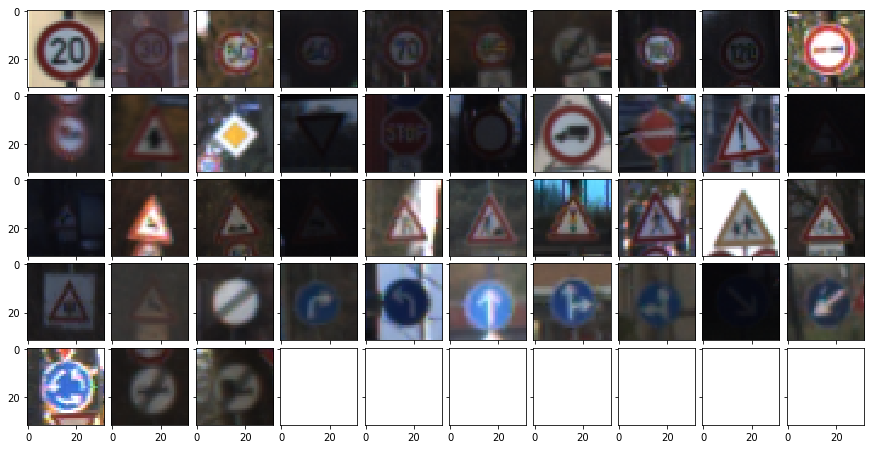

Cell finished


In [31]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Visualizations will be shown in the notebook.
%matplotlib inline

# Loop through the amount of unique training labels, and select any image associated to said label
example_sign_images = []

for i in range(len(np.unique(y_train))):
    j = 0
    
    # Determine a valid image for this label
    while (y_train[j] != i):
        j = j+1
        
    # Append image index to array
    example_sign_images.append(j)

# Draw a grid. Determine amount of rows based on the total amount of cells and columns used.
cols = 10
rows = math.ceil(len(np.unique(y_train))/cols)

figure = plt.figure(1, (15., 15.))
image_grid = ImageGrid(figure, 111, nrows_ncols=(rows, cols), axes_pad=0.1)

# Populate the grid with images from the index
for i in range(len(np.unique(y_train))):
    image_grid[i].imshow(X_train[example_sign_images[i]])
    
plt.show()

print('Cell finished')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#### Dataset grayscale

The first step is to grayscale the training and testing datasets. To fulfill our goal and correctly detect traffic signs it's interesting to focus on shape instead of color, given that there shouldn't be any classes with the same shape but different color. Also, researcher Yann LeCun [observed improved accuracy during his research](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) while using grayscale over color images.

In [5]:
### Grayscale the entire datasets. We are better off without color...
import cv2

X_train_grayscale = np.sum(X_train/3, axis=3, keepdims=True)
X_test_grayscale = np.sum(X_test/3, axis=3, keepdims=True)
X_valid_grayscale = np.sum(X_valid/3, axis=3, keepdims=True)

X_train = X_train_grayscale
X_test = X_test_grayscale
X_valid = X_valid_grayscale

print('Cell finished')

Cell finished


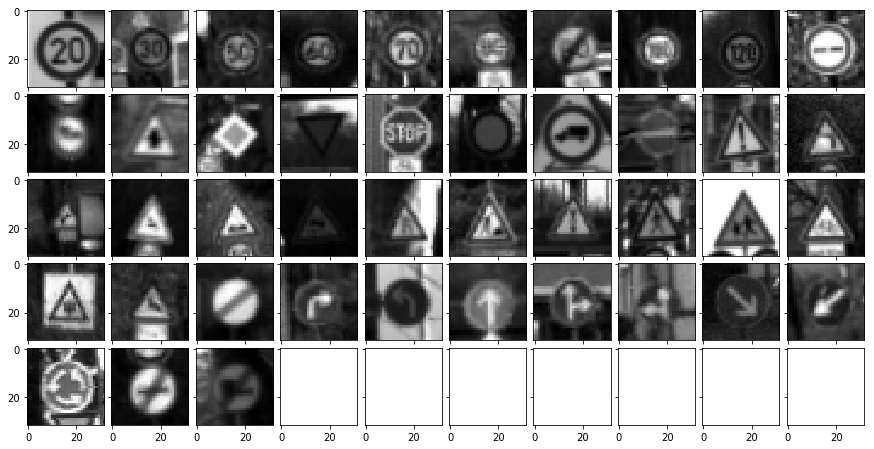

Cell finished


In [6]:
### Output visualization grid 
# Draw a grid. Determine amount of rows based on the total amount of cells and columns used.
cols = 10
rows = math.ceil(len(np.unique(y_train))/cols)

figure = plt.figure(1, (15., 15.))
image_grid_2 = ImageGrid(figure, 111, nrows_ncols=(rows, cols), axes_pad=0.1)

i = 0

# Populate the grid with images from the index
for i in range(len(np.unique(y_train))):
    # Image squeeze() necessary to display grayscale in plot
    image = X_train[example_sign_images[i]].squeeze()
    image_grid_2[i].imshow(image, cmap='gray')
    
plt.show()

print('Cell finished')

#### Normalize

Normalization helps by preventing over/under-compensating corrections in different dimensions (*lollercoaster* [explains this very well](http://stats.stackexchange.com/a/185857) at CrossValidated).

In [32]:
print(np.mean(X_train))
print(np.mean(X_test))

X_train_normalized = (X_train - 128)/128
X_test_normalized = (X_test - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))

X_train = X_train_normalized
X_test = X_test_normalized

print('Cell finished')

82.677589037
82.1484603612
1.21925099939
1.21879869422
Cell finished


#### Data Augmentation

Running my model as is without data augmentation provided an accuracy range of 0.88-0.93 and a test accuracy of 0.96. Even though this covers the project rubric requirements, I wanted to experiment by augmenting the data set with subtle changes which theoretically, should be able to improve our training results.

#### Data Augmentation - scale

Let's start off with a two functions that upscale and downscale the image. It's important to maintain image size!

In [8]:
def upscale(image):
    # Scale and return correctly sized image
    scaled = cv2.resize(image, None, fx=1.1, fy=1.1, interpolation=cv2.INTER_LINEAR)
    return scaled[2:34,2:34]

def downscale(image):
    # Downscale
    scaled = cv2.resize(image, None, fx=0.9, fy=0.9, interpolation=cv2.INTER_LINEAR)
    
    # Add padding so the correct size is maintained
    # I erroneously missed this initially, causing tf to get very mad at me.
    scaled = np.append(displace(scaled,2,2),np.zeros((29,3)),axis=1)
    scaled = np.append(scaled,np.zeros((3,32)),axis=0)
    return scaled

#### Data Augmentation - rotate

In [9]:
def rotate(image, angle):
    rows,cols = image.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1)
    return cv2.warpAffine(image, M, (cols,rows))

#### Data Augmentation - shift

In [10]:
def shift(image, dist_x, dist_y):
    rows,cols = image.shape
    M = np.float32([[1,0,dist_x],[0,1,dist_y]])
    return cv2.warpAffine(image,M,(cols,rows))

#### Data Augmentation - dataset expansion

In [11]:
# wip

#### Data Augmentation - Shuffle and split

In [12]:
# wip

### Model Architecture

The architecture I used started off Yann Lecun's proposal, but I added a few more layers in the process. The original model:

* Layer 1: Convolutional. The output shape should be 28x28x6.
* Activation.
* Pooling. The output shape should be 14x14x6.
* Layer 2: Convolutional. The output shape should be 10x10x16.
* Activation.
* Pooling. The output shape should be 5x5x16.
* Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.
* Layer 3: Fully Connected. This should have 120 outputs.
* Activation.
* Layer 4: Fully Connected. This should have 84 outputs.
* Activation.
* Layer 5: Fully Connected (Logits). This should have 10 outputs.

I morphed it into the following model detailed below. This was a result of tweaking and testing different layer combinations and trying to understand how each convolutional, activation, pooling, flatten and dropout layer had an influence on overall accuracy. I was able to pass the minimum testing accuracy with multiple approaches, but this seemed the most accurate **without data agumentation**.

* Layer 1: Convulational
* Activation.
* Layer 2: Convolutional
* Activation with RELU.
* Pooling.
* Layer 3: Convolutional.
* Activation with RELU.
* Layer 4: Convolutional.
* Activation with RELU.
* Pooling.
* Flatten.
* Layer 5: Fully connected. 600 units.
* Activation with RELU.
* Dropout layer.
* Layer 6: Fully connected. 300 units.
* Activation with RELU.
* Dropout layer.
* Layer 7: Fully conected. 43 units.

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x32
    conv1_W = tf.Variable(tf.truncated_normal((3,3,1,32),mean = mu,stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1 = tf.nn.conv2d(x,conv1_W,strides = [1,1,1,1],padding = 'VALID')
    conv1 = tf.nn.bias_add(conv1,conv1_b)
    
    # Relu Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Convolutional. Input = 32x32x32. Output = 30x30x32.
    conv2_W = tf.Variable(tf.truncated_normal((3,3,32,32),mean = mu,stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2 = tf.nn.conv2d(conv1,conv2_W,strides = [1,1,1,1],padding = 'VALID')
    conv2 = tf.nn.bias_add(conv2,conv2_b)
    
    # Relu Activation.
    conv3 = tf.nn.relu(conv2)
    
    # Max Pooling. Input = 28x28x32. Output = 14x14x32.
    conv4 = tf.nn.max_pool(conv3,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')
    
    # Layer 3: Convolutional. Output = 12x12x32.
    conv5_W = tf.Variable(tf.truncated_normal((3,3,32,32),mean = mu,stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(32))
    conv5 = tf.nn.conv2d(conv4,conv5_W,strides = [1,1,1,1],padding = 'VALID')
    conv5 = tf.nn.bias_add(conv5,conv5_b)
    
    # Relu Activation.
    conv5 = tf.nn.relu(conv5)
    
    # Layer 4: Convolutional. Input = 12x12x32. Output = 10x10x32
    conv6_W = tf.Variable(tf.truncated_normal((3,3,32,32),mean = mu,stddev = sigma))
    conv6_b = tf.Variable(tf.zeros(32))
    conv6 = tf.nn.conv2d(conv5,conv6_W,strides = [1,1,1,1],padding = 'VALID')
    conv6 = tf.nn.bias_add(conv6,conv6_b)
    
    # Relu Activation.
    conv6 = tf.nn.relu(conv6)
    
    # Max Pooling. Input = 10x10x32. Output = 5x5x32.
    conv7 = tf.nn.max_pool(conv6,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'VALID')
    
    # Flatten. Input = 5x5x16. Output = 800.
    f3 = tf.contrib.layers.flatten(conv7)
    
    # Layer 5: Fully Connected. Input = 800. Output = 600.
    fc4_W = tf.Variable(tf.truncated_normal((800,600),mean = mu,stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(600))
    fc4 = tf.add(tf.matmul(f3,fc4_W),fc4_b)
    
    # Relu Activation.
    fc4 = tf.nn.relu(fc4)
    
    # Dropout
    fc4 = tf.nn.dropout(fc4,keep_prob)
    
    # Layer 6: Fully Connected. Input = 600. Output = 400.
    fc5_W = tf.Variable(tf.truncated_normal((600,400),mean = mu,stddev = sigma))
    fc5_b = tf.Variable(tf.zeros(400))
    fc5 = tf.add(tf.matmul(fc4,fc5_W),fc5_b)
    
    # Activation.
    fc5 = tf.nn.relu(fc5)

    # Dropout
    fc5 = tf.nn.dropout(fc5,keep_prob)

    # Layer 7: Fully Connected. Input = 400. Output = 43.
    fc6_W = tf.Variable(tf.truncated_normal((400,43),mean = mu,stddev = sigma))
    fc6_b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc5,fc6_W),fc6_b)
    
    return logits

print('Cell finished')

Cell finished


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

**NOTE**: I experienced an issue with the udacity-carnd AWS image and an involuntary system update. Apparently this surfaced a [bug](https://bugs.launchpad.net/bugs/1674666) with nVidia's GPU drivers for the GRID K520 used in AWS g2 instances.

#### Training pipeline

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

EPOCHS=20
BATCH_SIZE=128

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob=tf.placeholder(tf.float32)#FOR DROPOUT
with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, 43)
    
#Training pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

print('Cell finished')

Cell finished


#### Model Evaluation

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('Cell finished')

Cell finished


#### Train the Model

In [16]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")
    
print('Cell finished')

Training...

EPOCH 1 ...
Validation Accuracy = 0.658

EPOCH 2 ...
Validation Accuracy = 0.779

EPOCH 3 ...
Validation Accuracy = 0.855

EPOCH 4 ...
Validation Accuracy = 0.829

EPOCH 5 ...
Validation Accuracy = 0.802

EPOCH 6 ...
Validation Accuracy = 0.864

EPOCH 7 ...
Validation Accuracy = 0.864

EPOCH 8 ...
Validation Accuracy = 0.772

EPOCH 9 ...
Validation Accuracy = 0.857

EPOCH 10 ...
Validation Accuracy = 0.869

EPOCH 11 ...
Validation Accuracy = 0.904

EPOCH 12 ...
Validation Accuracy = 0.854

EPOCH 13 ...
Validation Accuracy = 0.862

EPOCH 14 ...
Validation Accuracy = 0.898

EPOCH 15 ...
Validation Accuracy = 0.912

EPOCH 16 ...
Validation Accuracy = 0.837

EPOCH 17 ...
Validation Accuracy = 0.883

EPOCH 18 ...
Validation Accuracy = 0.907

EPOCH 19 ...
Validation Accuracy = 0.907

EPOCH 20 ...
Validation Accuracy = 0.787

Model saved
Cell finished


#### Evaluate the model

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.948


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

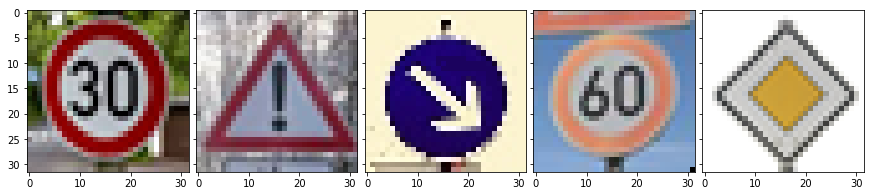

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# This code expects 32x32 images...

from os import listdir
from os.path import isfile, join
path = 'other-traffic-signs'

test_signs_rgb = [f for f in listdir(path) if isfile(join(path, f))]
test_images_raw = []
test_images_gray = []

for test_sign in test_signs_rgb:
    test_sign_raw = cv2.imread(path + '/' + test_sign)
    
    # Append color image
    test_images_raw.append(np.asarray(test_sign_raw))
    
    # Append grayscale image
    test_image_gray = cv2.cvtColor(test_sign_raw, cv2.COLOR_RGB2GRAY)
    test_images_gray.append(np.asarray(test_image_gray))

# Grid the images! This code seems familiar... doesn't it?
# Draw a grid. Determine amount of rows based on the total amount of cells and columns used.
cols = 5
rows = math.ceil(len(test_images_raw)/cols)

figure = plt.figure(1, (15., 15.))
image_grid = ImageGrid(figure, 111, nrows_ncols=(rows, cols), axes_pad=0.1)

# Populate the grid with images from the index
for i in range(len(test_images_raw)):
    image_grid[i].imshow(cv2.cvtColor(test_images_raw[i], cv2.COLOR_RGB2BGR))
    
plt.show()

### Predict the Sign Type for Each Image

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import csv

# Convert to array so I can manipulate the datasets easily
test_images = np.array(test_images_gray)

# Resize so TensorFlow doesn't go bonkers
test_images=np.reshape(test_images,(test_images.shape[0],32,32,1))

# Normalize
test_images = (test_images/255.0)-0.5

# Predict
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = tf.argmax(logits,1)
    predictions = sess.run(prediction,feed_dict={x: test_images, keep_prob: 0.5})

print(predictions)

[ 1 18 38  3 12]


### Analyze Performance

The quickest way to analyze performance is to compare the plot above with the five traffic signs to the referenced sign names in the included .csv file.

In [26]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# Run prediction against signnames.csv
with open('signnames.csv','r') as f:
    reader = csv.reader(f)
    sign_names = dict(reader)
    
for i in range(len(predictions)):
    print('File #'+ str(i+1) + ':' + sign_names[str(predictions[i])] + '(label: ' + str(predictions[i]) +')')

File #1:Speed limit (30km/h)(label: 1)
File #2:General caution(label: 18)
File #3:Keep right(label: 38)
File #4:Speed limit (60km/h)(label: 3)
File #5:Priority road(label: 12)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    prediction = tf.nn.softmax(logits)
    top_softmax = sess.run(tf.nn.top_k(prediction,k=5),feed_dict={x: test_images, keep_prob: 0.5})

probabilities,sign_type = top_softmax

print(probabilities)
print(sign_type)

[[  5.30476213e-01   4.67758030e-01   9.34090524e-04   5.04733878e-04
    1.79563212e-04]
 [  1.00000000e+00   2.14702783e-10   1.60704700e-10   1.07449057e-10
    1.57769232e-11]
 [  1.00000000e+00   3.16171633e-12   2.37832833e-15   1.94616196e-15
    1.86038738e-15]
 [  9.99994159e-01   5.77787887e-06   5.55578410e-08   3.79430602e-08
    2.62509250e-08]
 [  1.00000000e+00   1.05450218e-10   8.19514508e-12   2.52672341e-12
    6.50349837e-13]]
[[ 1 39  2 14 15]
 [18 26 38 25 37]
 [38 12  2 25 34]
 [ 3  5 29 23 31]
 [12 40  9 10  7]]


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 